#  Support Vector Machines

## Quiz and Basic Intuition

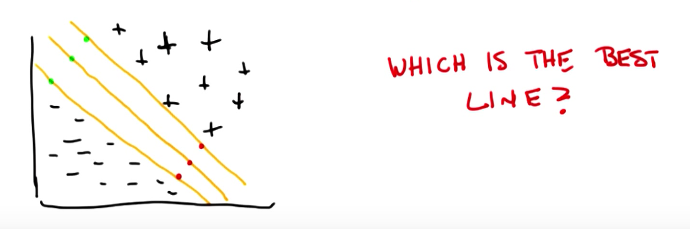

Ans: The middle line

Why not the other lines? 
* The lines that are to close to the +'s or -'s 
* The issue is that our data is a sample of the whole space. We don't know what will happen close to those other +'s or -'s
 * You're trusting the data to much
 * The lines on the sides are in a way overfitting.
 * **i.e. the middle line is the line that is consistant to the data while commiting least to it.**

**Take away** you want to commit the least you can to the data (allowing for generalisation) while still being consistant 

## Margins

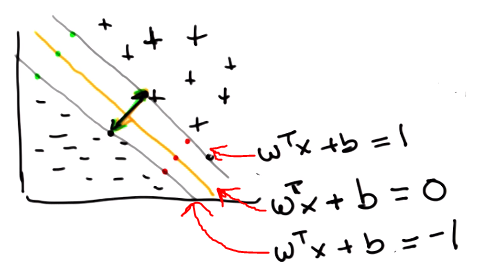

Formula for the hyperplane to seperate our classes
$$y = w^Tx+b$$
**Notation** 

$y$ - classification label
    
    $<0$ values are - points
    
    $>0$ values are + points
    
$w$ - paramaters of the plane

$b$ - moves the hyper-plane away from the origin

We want to find that orange line. That has the property that:
* decision boundary tells us if we are in the positibe or negative class
* as far away from the data as possible while still being consistant to it
* Maximise the length between the two gray lines
* If a point lies on the hyperplane: $w^Tx+b=0$
* 
* 

Consider the distance between the two gray lines. 

It turns out that finding the optimal decision boundary is the same as finding a line that maximises the margin. 
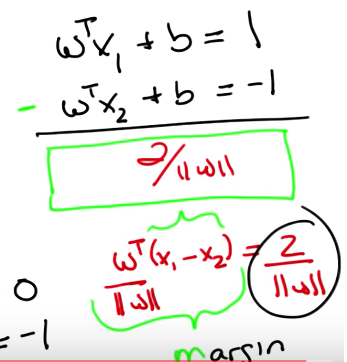

## Maximiseing the margin

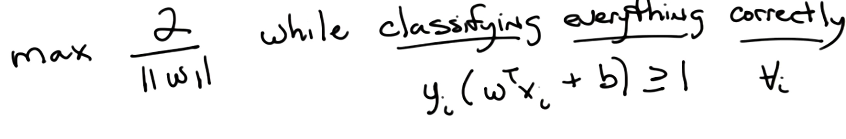
The above is actaully very hard to do. Instead we minimise the reciprical of the above:

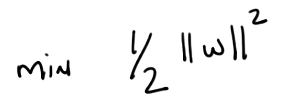

This works because the point that maximises will minimise the other as we took the recipricol. And the squaring makes it monotone, it magnifies but doesn't change the ordering. 

This is easier because when we have an optimisation problem of this form, which is called a *quadratic programming problem*, we can then solve for it using existing techniques.

We can change the above into the normal form for a quadratic programming problem:
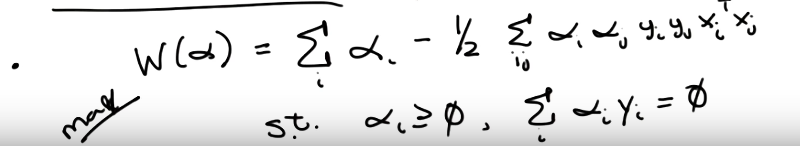

Important take away from this section, understand the implications of each step in the delelopment of the equations we are trying to optimise but don't get bogged down by the math inbetween, just accept that they are equivilant.

**Properties of the $W(\alpha)$ equation**

When you find the $\alpha$ for this equation you can recover the $w$. We can then find $b$

Most of those $\alpha$'s are 0 -> the corresponding $i$ data point doesn't factor into $W$. i.e. some of the vectors matter but most of the vectors don't.

So we can build the model by only using a few vector, whos corresponding $\alpha$'s are non-zero.

***Intuition Quiz***

The circled points have zero $\alpha$'s. The points that can't be used to define the contours of that decision boundary don't matter.
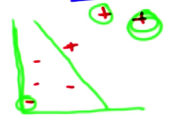

It's like knn, instance learning (learning from the local data to the boudanry), but we have done some work to figure out what is important and what we could throw away without any information loss. 

**Note on dot product**
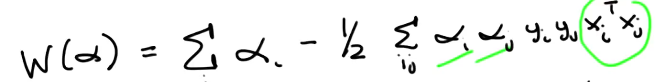

The dot product in this equation can be thought of as a metric of the similarity of the 2 x points. 

## Kernel

Linear isn't always enough, we can project data into a higher dimensional space and make comparisons there.

Let $K()$ be a kernel
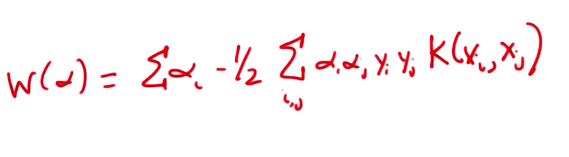

And think of $K()$ as some similarity function. We can inject domain knowledge into how $K()$ is defined.

We are projecting into some higher dimensional space where the points are linearly seperable. Because we are using this kernel function to represent our domain knowlage, we dont have to transform our data into a higher dimension. 

**[Example](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)**
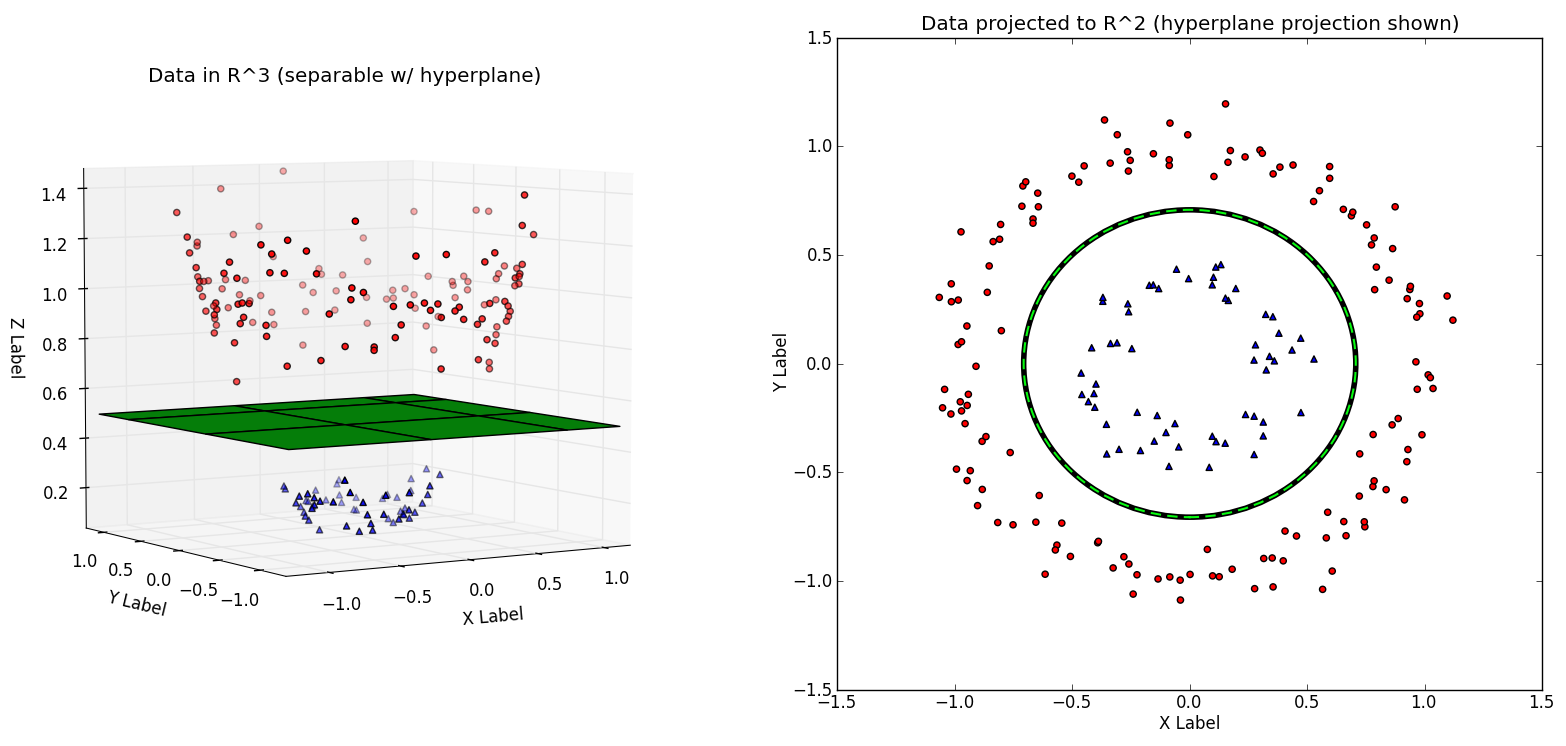

**Some kernel examples**

* $k = (x^Ty)^2$ - circle
* $k = x^Ty$
* $k = (x^Ty+c)^p$ - polynomial kernel

Thinking back to polynomial linear regression, in the SVM case we are sperating our points in higher dimensions according to polynomail similarities.

**NOTE**

* We could even use descrete values in the kernel as long as some value that communicates a "similarity" metric
* Technical requirment for kernels: (layment explanation) acts like a distance or a similarity

## Summary

* A margin is a usefull concept in generalisation and overfitting
* Big is better (margins)
* Optimization problem for finding max margins: quadratic program
* Support Vectors
* Think of SVM as eager lazy learning - the classifer was based on a subset of the data 
* Linear isn't always enough, we can project data into a higher dimensional space and make comparisons there. 
* Kernel Trick, $x^Ty$ -> generalise it -> $K(x,y)$


# Implementing SVM

The SVM is maximising the margin
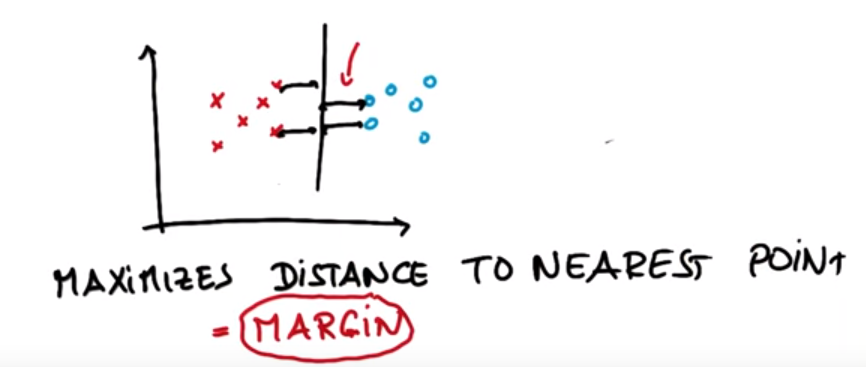

By maximsiing the distance between seprating line and the data we are maximising the *robustness* of our model.

i.e. most robust to classification errors. 
If we pick a line close to the data, a small amount of noise could make a data point be classified as `x` or `o`

** A caviat **
SVM will produce the bottom seperation line because SVM prioritises correct classification and **THEN** maximises the margin.

i.e. subject to the constraints of classificiton the margin is maximised.

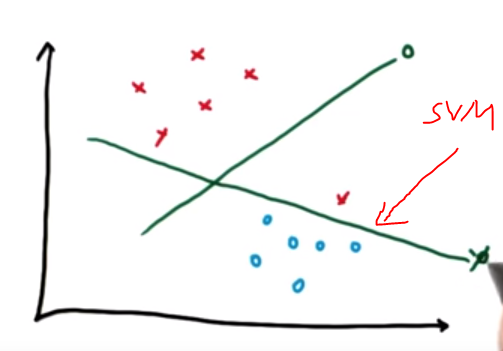

** How to handle outliers?**

The algorithm will try do the best it can. 
It is robust to outliers, defined by paramaters.

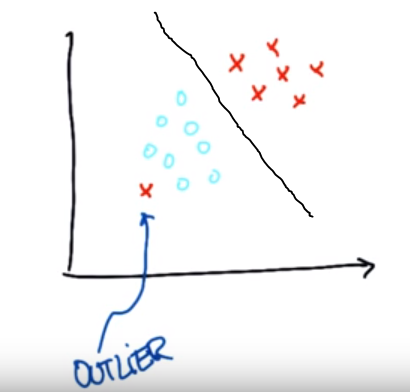

## Kernels

We can map our data into a new space $(x,y,z)$ whereby it then becomes linearly seperable. See illustration bellow.

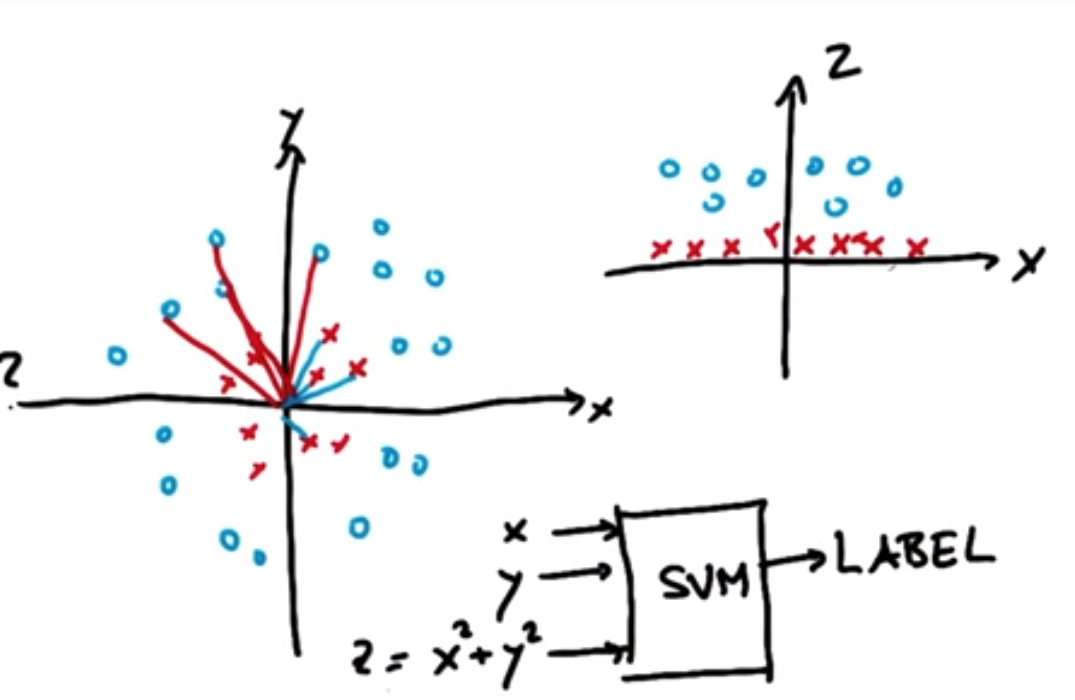

In this case, $z=x^2+x^2$ will produce values close to 0 for point near the origin and large values for points far away from the origin. Hence the mapping seen in the $x,z$ plot

Mapping the seperating line (actually a hyperplane) in the new cordinate system maps to a circle in the original co-ordinate system. Again, recall that this mapping is determined by the kernel.

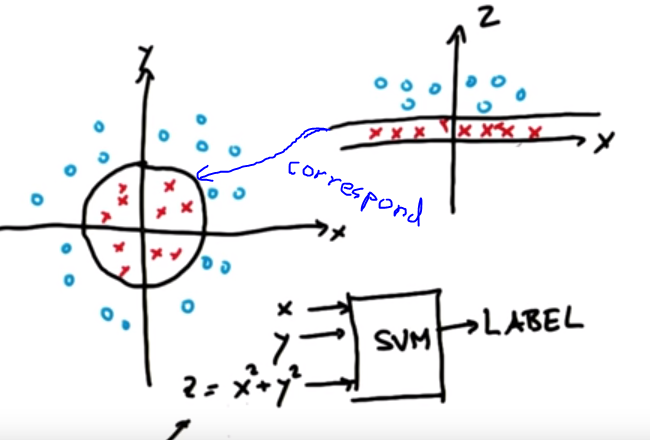

**Another Example:**
The kernel $|x|$ will seperate the following data.
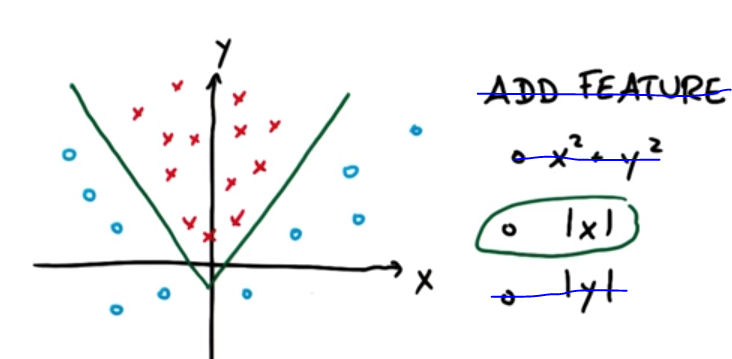

### Example Kernels

* Linear
* Polynomial
* rbf
* sigmoid

### Summary

Kernels allow us to map into higher dimensions where the data becomes linearly seperable. We find the solution in that space and then we can move back to the original space where our data still remains seperated.

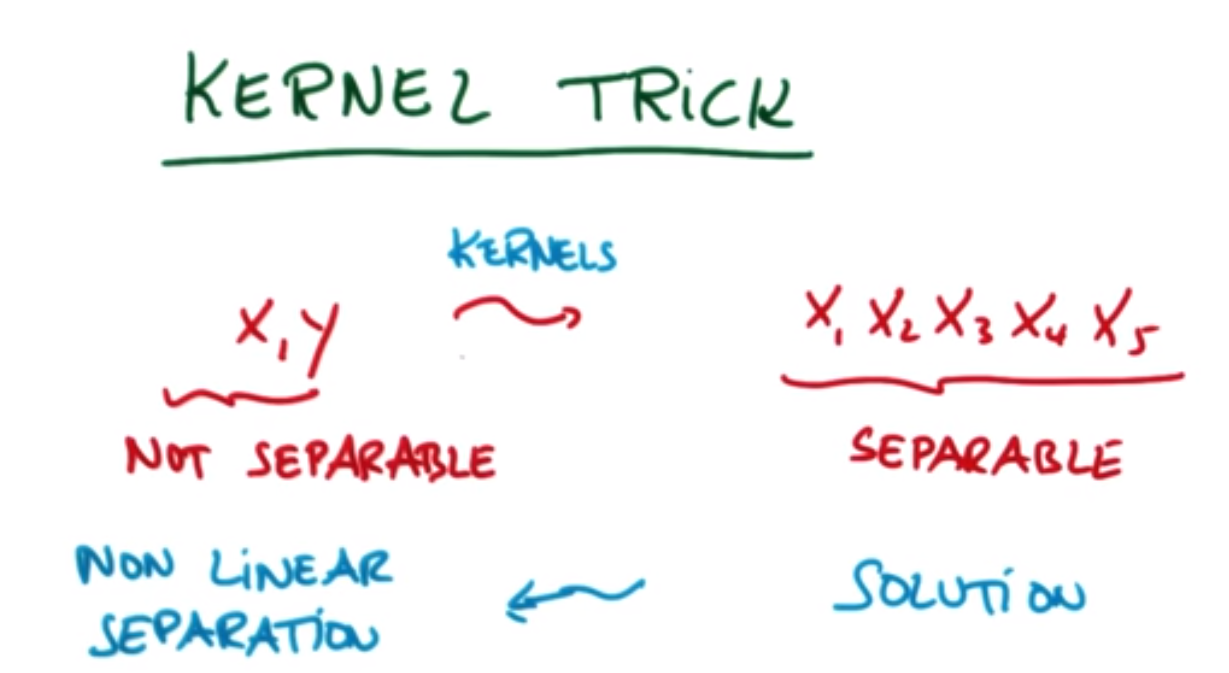

## SVM in SKlearn

In [4]:
import sys
#from class_vis import prettyPicture
#from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()

########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC

##Notice that the kernel was set here as linear
clf = SVC(kernel="linear")


#### now your job is to fit the classifier
#### using the training features/labels, and to
#### make a set of predictions on the test data

clf.fit(features_train, labels_train)

pred = clf.predict(features_test)

#### store your predictions in a list named pred

from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

print acc

0.92


### Plotting Different Kernels

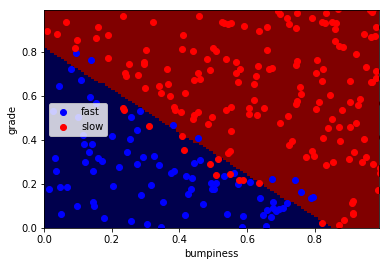

In [6]:
%matplotlib inline
prettyPicture(clf, features_test, labels_test)

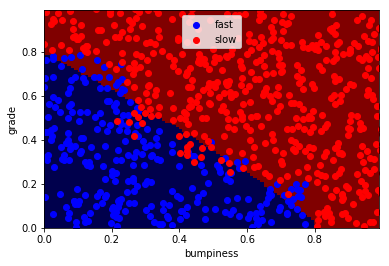

In [7]:
clf_rbf = SVC(kernel="rbf")
clf_rbf.fit(features_train, labels_train)
%matplotlib inline
prettyPicture(clf_rbf, features_train, labels_train)

### C Paramater

**The C parameter** controls tradeoff between smooth decision boudary and classifying points correctly. 
* A low C makes the decision surface smooth.
* A high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

Low c on the left, high c on the right.
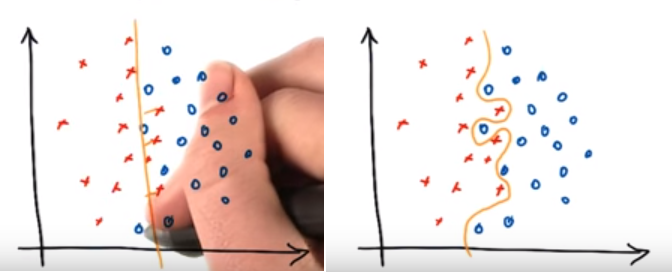

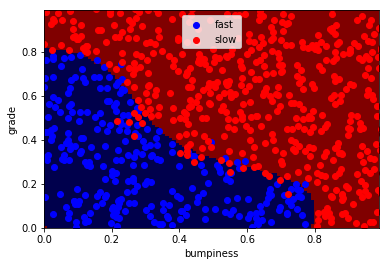

In [13]:
clf_rbf = SVC(kernel="rbf",C=10000)
clf_rbf.fit(features_train, labels_train)
%matplotlib inline
prettyPicture(clf_rbf, features_train, labels_train)

### Gamma Parameter

**The gamma parameter** defines how far the influence of a single training example reaches.
* Low values meaning ‘far’ 
* High values meaning ‘close’. 

On the left, with a high value of gamma, only the close points are used as the support vectors to determine the decision boundary (the points in the blue circles are effectivly ignored). While on the right, with a low gamma value, almost all the points are used to determine a a decision boundary. 

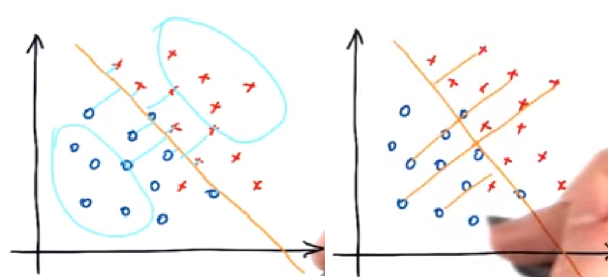

What this means is that for high values of gamma, our decision boundary is more lickly to be smooth/stright as more training points have an inffluence on the decision boundary - seen on the left. 

While a high value of gamma will give training points near the decision boundary alot more weight and as such have greater influence on the decision boundaries shape - seen on the right.

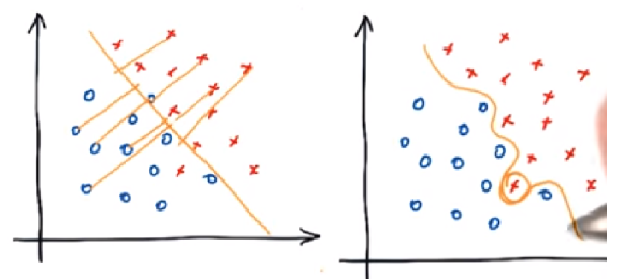

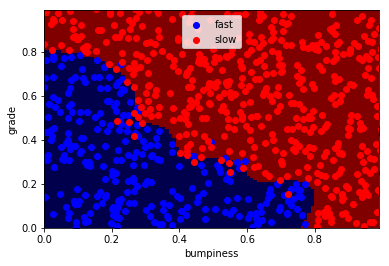

In [19]:
clf_rbf = SVC(kernel="rbf",gamma=100)
clf_rbf.fit(features_train, labels_train)
%matplotlib inline
prettyPicture(clf_rbf, features_train, labels_train)

### Overfitting

Overfitting can be controled through:
* C paramater
* Gamma paramater 
* Kernel 

## Strengths and Weaknesses

* Work well in complicated domains, where there is a clear margin of seperation 

* Not well with large data sets because the training time is $n^3$

* Don't work well with noise

# Dependancies 

In [1]:
#class_vis.py
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    #plt.savefig("test.png")
    plt.show()
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

In [3]:
# prep_terrain_data.py
#!/usr/bin/python
import random

def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data